In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
## 밑의 'linear'를 변경해서 모델을 다르게 학습시킬 수 있다.

clf = svm.SVC(kernel = 'linear')


import matplotlib.colors as colors
df1 = iris_frame[["sepal length (cm)","sepal width (cm)","target"]]
X= df1.iloc[:,0:2]
Y= df1.iloc[:,2].replace({'setosa' : 0,
                          'versicolor':1,
                          'virginica':2}).copy()
clf.fit(X,Y)

SVC(kernel='linear')

C:\Users\sangy\anaconda3\envs\machinelearning\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


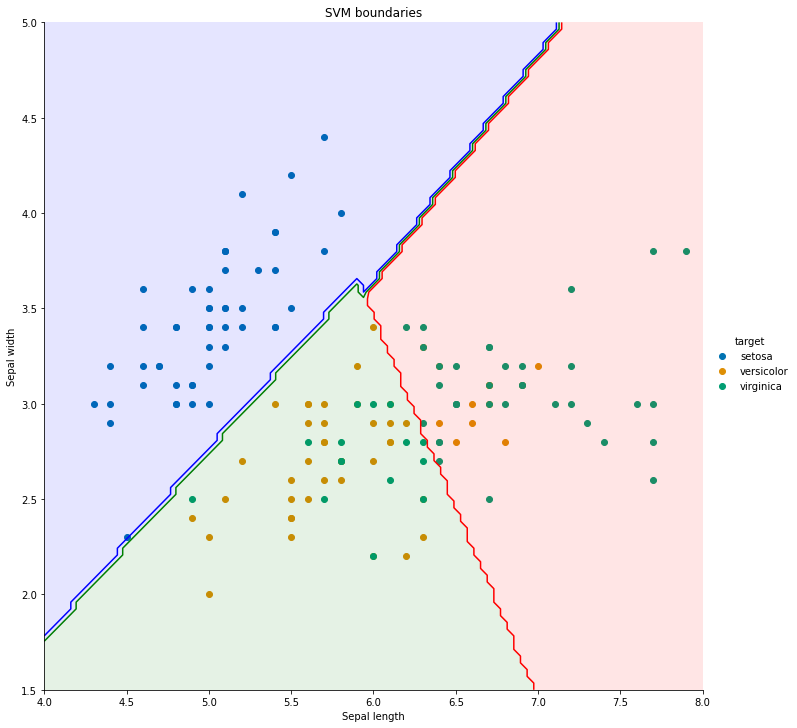

In [4]:
import seaborn as sn

N = 100
X_ = np.linspace(4,8, N)
Y_ = np.linspace(1.5,5, N)
X_,Y_=np.meshgrid(X_, Y_)
color_list = ["Blues, Greens, Reds"]
my_norm = colors.Normalize(vmin = -1, vmax = 1.)
g = sn.FacetGrid(iris_frame,hue = "target", 
                 size= 10, 
                 palette = "colorblind").map(plt.scatter, 
                                             "sepal length (cm)",
                                            "sepal width (cm)",).add_legend()

my_ax = g.ax
zz =  np.array( [clf.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries')


plt.show()